## Codio Activity 7.5: Calculating Multiple Loss Functions

**Expected Time = 60 minutes**

**Total Points = 20**

A third loss function mentioned is the Huber loss function.  This is notable for its resistance to extreme values and is defined as a piecewise function:


$${\displaystyle L_{\delta }(y,f(x))={\begin{cases}{\frac {1}{2}}(y-f(x))^{2}&{\textrm {for}}|y-f(x)|\leq \delta ,\\\delta \,(|y-f(x)|-{\frac {1}{2}}\delta ),&{\textrm {otherwise.}}\end{cases}}}$$

In this activity, you will compute and compare the results of minimizing the mean squared error, mean absolute error, and huber loss functions.  

NOTE: If the formula is not rendering correctly (overlapping text), double-click in this cell and then Shift-Enter to reload the cell.


## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)

In [25]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

### The tips data

For this exercise, the tips dataset from the lectures will be used, and you are to predict the tip amount given the total bill.  

In [6]:
tips = sns.load_dataset('tips')

In [7]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
X = tips['total_bill']
y = tips['tip']

[Back to top](#Index:) 

## Problem 1

### Create a Huber Loss function

**10 Points**

Using the formula repeated below for the Huber loss, complete the function that returns the sum of the Huber Loss equation.

$${\displaystyle L_{\delta }(y,f(x))={\begin{cases}{\frac {1}{2}}(y-f(x))^{2}&{\textrm {for}}|y-f(x)|\leq \delta ,\\\delta \,(|y-f(x)|-{\frac {1}{2}}\delta ),&{\textrm {otherwise.}}\end{cases}}}$$

Your function will take in both a value for $\theta$ and for $\delta$.  Set the value of $\delta = 1.5$ by default.

In [18]:
#GRADED

def huber_loss(theta, delta):
    """
    This function accepts a value for theta
    and returns the sum of the huber loss.
    
    Arguments
    ---------
    theta: float
           Values to use for parameter
           of regression model.
           
    delta: float
           Value for delta in Huber Loss
            
    Returns
    -------
    huber: np.float
         Sum of huber loss
    """

# YOUR CODE HERE
def huber_loss(theta, delta=1.5):
    y_predict = theta*X
    y_err = np.abs(y-y_predict)
    
    if (y_err<=delta).any():
        return sum(1/2*(y_err**2))
    else:
        return sum(delta*(y_err-(delta/2)))
    
huber_loss(8)

56561.369999999995

[Back to top](#Index:) 

## Problem 2

### Minimizing Huber Loss

**10 Points**

Use the `minimize` function imported from `scipy.optimize` to determine the optimal value for $\theta$ based on the Huber Loss with $\delta = 1.5$.  Assign your results as type `np.float` to `theta_huber` below with `x0 = .5`.  

In [21]:
### GRADED

theta_huber = ''

# YOUR CODE HERE
minimum_theta = minimize(huber_loss, x0 = .5)
theta_huber = np.float(minimum_theta.x[0])
# Answer check
print(type(theta_huber))
print(theta_huber)

<class 'float'>
0.14373189541992312


[Back to top](#Index:) 

## Problem 3

### Plotting and Comparing Models

**0 Points**

Now, complete the function below that will generate a `matplotlib` scatterplot of your data `X` vs. `y` and include plots of the models resulting from `mse`, `mae`, and `huber` loss functions.  This problem is not graded.

0.1515151515151516 1.2066132197534216
0.1515151515151516 0.7718343268753106
0.1515151515151516 147.20681280991738


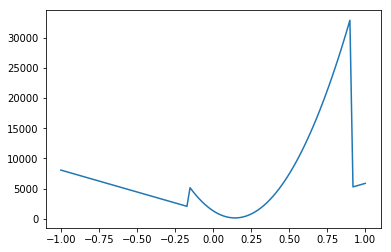

In [39]:
def mse_for_theta(theta):
    return mean_squared_error(theta*X,y)
def msa_for_theta(theta):
    return np.mean(abs(y-theta*X))
def huber_for_theta(theta,delta=1.5):
    y_predict = theta*X
    y_err = np.abs(y-y_predict)
    
    if (y_err<=delta).any():
        return sum(1/2*(y_err**2))
    else:
        return sum(delta*(y_err-(delta/2)))

def err_funcs(thetas,mses, msas,hubers):
    mses = [mse_for_theta(theta) for theta in thetas]
    msas = [msa_for_theta(theta) for theta in thetas]
    hubers = [huber_for_theta(theta) for theta in thetas]
    return mses, msas, hubers

mses=None
msas=None
hubers=None
thetas = np.linspace(-1,1,100)
mses,msas,hubers=err_funcs(thetas,mses, msas,hubers)
#plt.plot(thetas, mses)
#plt.plot(thetas, msas)
plt.plot(thetas, hubers)
print(thetas[np.argmin(mses)], min(mses))
print(thetas[np.argmin(msas)], min(msas))
print(thetas[np.argmin(hubers)], min(hubers))
